### DQN 对比曲线

,epoch,method,max reward,mean reward
13,280,dqn,278.0,83.20
26,540,ddqn,313.0,96.24
23,480,dueling_ddqn,242.0,79.78


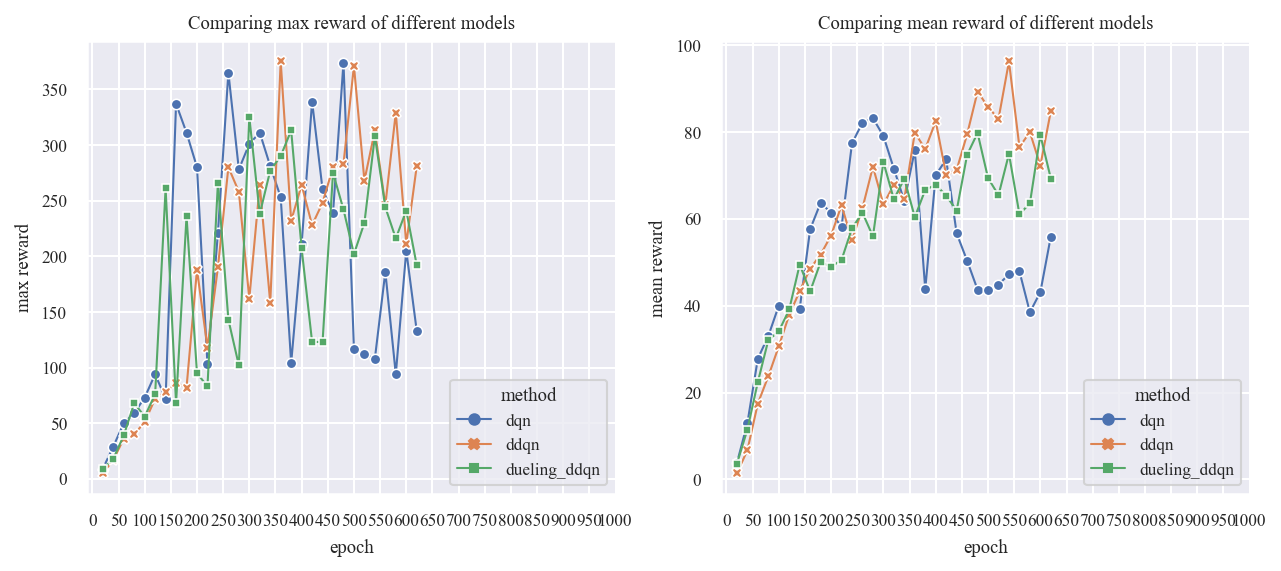

In [3]:
# SROIE noindex pad exp
from __future__ import print_function
import re
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

n = 1000
def get_results(path, method=None):
    pattern = re.compile('.*\[epoch=(\d+)\] max reward: (\d+), mean reward: ([\d\.]+),')
    result = []
    with open(path, 'r') as fo:
        for line in fo:
            res = pattern.findall(line.strip())
            if len(res) != 0:
                epoch = int(res[0][0])
                values = [float(x) for x in res[0][1:]]
                if 1 <= epoch <= n and epoch % 20 == 0:
                    result.append([epoch, method] + values)
    result = pandas.DataFrame(result,
        columns=['epoch', 'method', 'max reward', 'mean reward'])
    return result


data0 = get_results(
    '/home/caory/data/PDFInsight/deep_rl/logs/space_invaders_v1/train_logs/dqn.log',
    method='dqn')
data1 = get_results(
    '/home/caory/data/PDFInsight/deep_rl/logs/space_invaders_v1/train_logs/ddqn.log',
    method='ddqn')
data2 = get_results(
    '/home/caory/data/PDFInsight/deep_rl/logs/space_invaders_v1/train_logs/dueling_ddqn.log',
    method='dueling_ddqn')

data_max = []
for data in [data0, data1, data2]:
    index = data['mean reward'].idxmax()
    epoch = data.iloc[index]['epoch']
    row = data[data['epoch'] == epoch]
    data_max.append(row)
data_max = pandas.concat(data_max)
display(data_max)
data_whole = pandas.concat([data0, data1, data2])

figure1 = plt.figure()
sns.set(rc={
    'figure.figsize': (10, 4),
    'figure.dpi': 150,
    'lines.linewidth': 1,
    'lines.markersize': 5,
    'font.family': 'Times New Roman',
    'legend.loc': 'lower right'}, font_scale=0.75)
ax = plt.subplot(1, 2, 1)
g = sns.lineplot(
    x='epoch', y='max reward', hue='method', style='method', 
    markers=True, dashes=False, ax=ax, data=data_whole)
ax.set_title('Comparing max reward of different models')
ax.set_xticks(range(0, n+1, 50))
# ax.set_ylim(0.98, 1.0)

ax = plt.subplot(1, 2, 2)
g = sns.lineplot(
    x='epoch', y='mean reward', hue='method', style='method', 
    markers=True, dashes=False, ax=ax, data=data_whole)
ax.set_title('Comparing mean reward of different models')
ax.set_xticks(range(0, n+1, 50))
# ax.set_ylim(0.98, 1.0)

plt.show()